In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
FIGSIZE=(9, 6)

PARENT_DIR = Path.cwd().parent.joinpath('logs/experiments')
RESULTS_CSV = PARENT_DIR.joinpath('results.csv')

In [3]:
df = pd.read_csv(RESULTS_CSV)
df['log2_c'] = np.log2(df['c'])
df

,a,t,c,formulation,norm,attacker_name,success,distance,nits,log2_c
0,4,9,0.015625,szegedy,LINF,SciPyAttack,True,9.048204e-01,102,-6.0
1,4,9,0.031250,szegedy,LINF,SciPyAttack,True,9.881698e-01,23,-5.0
2,4,9,0.062500,szegedy,LINF,SciPyAttack,True,7.389252e-01,574,-4.0
3,4,9,0.125000,szegedy,LINF,SciPyAttack,True,7.408987e-01,711,-3.0
4,4,9,0.250000,szegedy,LINF,SciPyAttack,True,8.255327e-01,150,-2.0
...,...,...,...,...,...,...,...,...,...,...
7093,9,8,4.000000,carlini,L2,SciPyAttack,False,1.903195e-06,6,2.0
7094,9,8,8.000000,carlini,L2,SciPyAttack,False,5.406892e-07,34,3.0
7095,9,8,16.000000,carlini,L2,SciPyAttack,False,9.298135e-08,35,4.0
7096,9,8,32.000000,carlini,L2,SciPyAttack,False,1.205999e-07,42,5.0


## Success rate by category

In [4]:
# success rate by formulation
df.groupby(['formulation'])['success'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
formulation,,
szegedy,0.669516,3510
carlini,0.601709,3510
szegedy_alt,0.589744,39
carlini_alt,0.435897,39


In [5]:
# success rate by norm
df.groupby(['norm'])['success'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

,mean,count
norm,,
LINF,0.959848,2366
L2,0.590448,2366
L1,0.352494,2366


In [6]:
# success rate by attacker_name - will be interesting to compare
df.groupby(['attacker_name'])['success'].mean().sort_values(ascending=False)

attacker_name
SciPyAttack    0.634263
Name: success, dtype: float64

In [7]:
# combined success rate
df.groupby(['formulation', 'norm'])['success'].agg(['mean', 'count'])

mean  count
formulation norm                 
carlini     L1    0.311966   1170
            L2    0.557265   1170
            LINF  0.935897   1170
carlini_alt L1    0.307692     13
            L2    0.384615     13
            LINF  0.615385     13
szegedy     L1    0.392308   1170
            L2    0.626496   1170
            LINF  0.989744   1170
szegedy_alt L1    0.461538     13
            L2    0.538462     13
            LINF  0.769231     13

## Source-target heatmaps

In [8]:
def source_target_heatmap_success(formulation='szegedy', norm='L2'):
    filt_df = df[(df['formulation'] == formulation) & (df['norm'] == norm)]
    hm_succ = filt_df.groupby(['a','t'])['success'].mean().unstack(fill_value=0)
    _source_target_heatmap(hm_succ, f'Percentage of successful attacks ({formulation}, {norm})')

def source_target_heatmap_nits(formulation='szegedy', norm='L2'):
    filt_df = df[(df['formulation'] == formulation) & (df['norm'] == norm)]
    hm_nits = filt_df.groupby(['a','t'])['nits'].mean().unstack(fill_value=0)
    _source_target_heatmap(hm_nits, f'Mean number of iterations used ({formulation}, {norm})')

def source_target_heatmap_min_dist(formulation='szegedy', norm='L2', attacker_name='SciPyAttack'):
    filt_df = df[
        (df['formulation'] == formulation) &
        (df['norm'] == norm) &
        (df['attacker_name'] == attacker_name) &
        (df['success'] == True)
    ]
    hm_dist = filt_df.groupby(['a','t'])['distance'].min().unstack(fill_value=0)
    _source_target_heatmap(hm_dist, f'Minimum distance found ({formulation}, {norm})') # should probably add the attacker_name

def _source_target_heatmap(data, title):
    # plt.figure(figsize=(7, 6))
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, annot=True, fmt='.2f')
    plt.xlabel('Target class (t)')
    plt.ylabel('Source class (a)')
    plt.title(title)
    plt.show()

### Successful attacks heatmaps

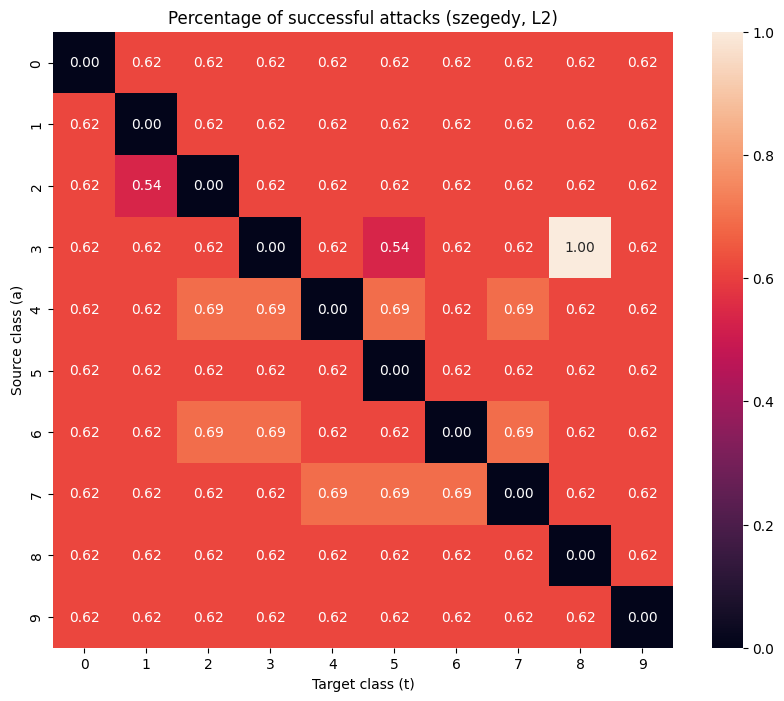

In [9]:
source_target_heatmap_success()

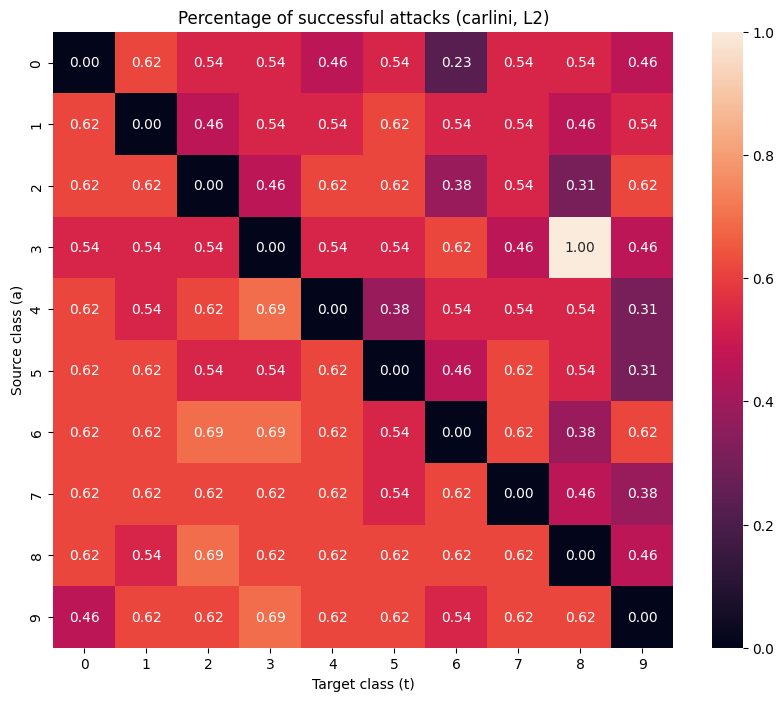

In [10]:
source_target_heatmap_success(formulation='carlini')

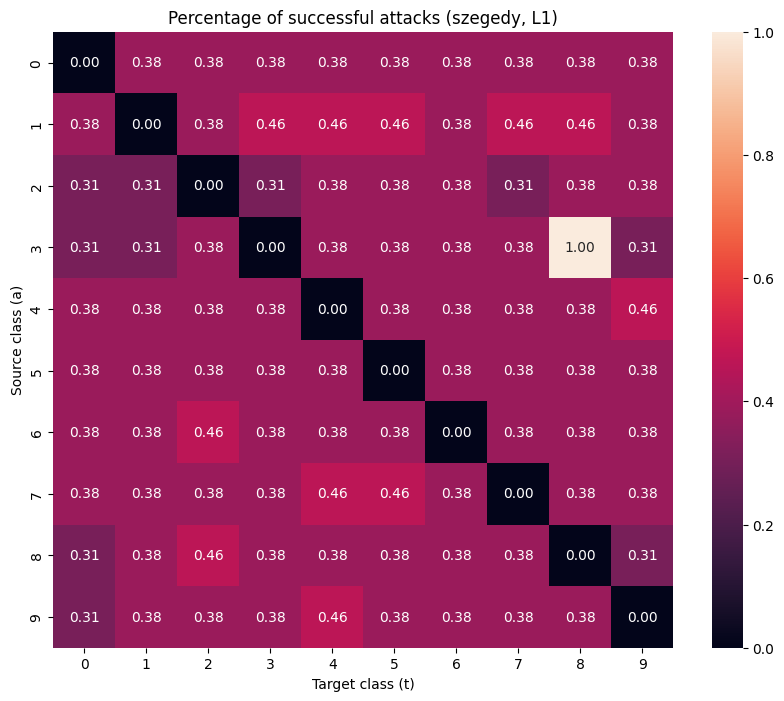

In [11]:
source_target_heatmap_success(norm='L1')

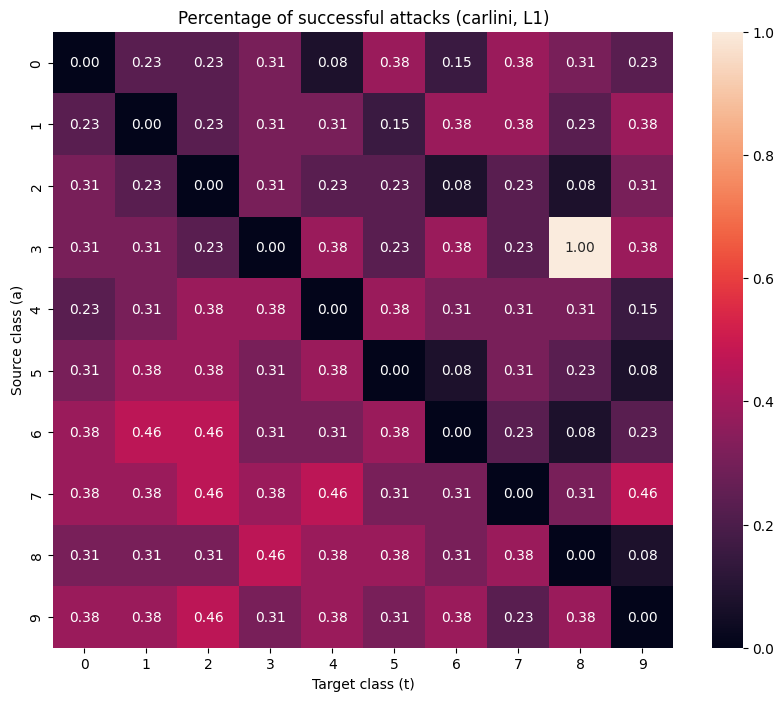

In [12]:
source_target_heatmap_success(formulation='carlini', norm='L1')

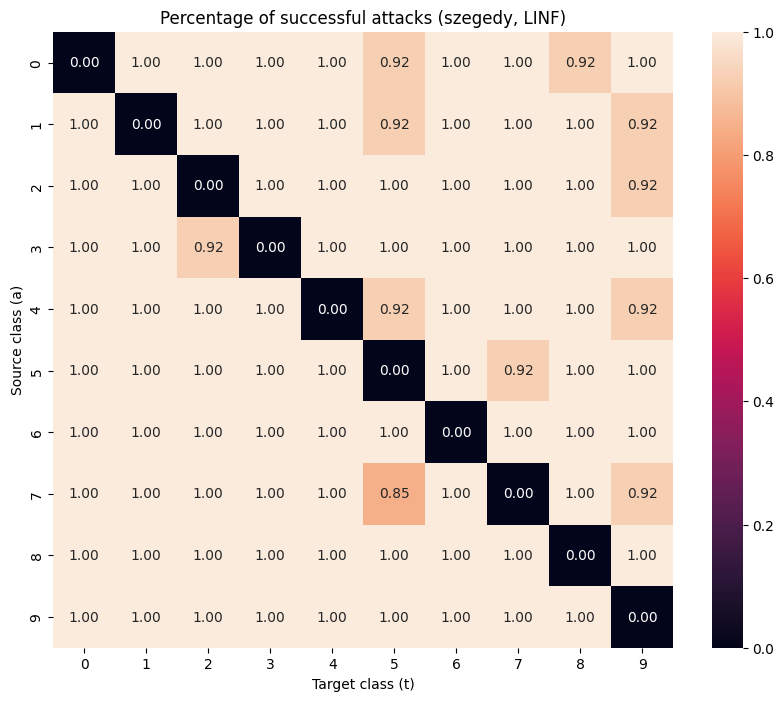

In [13]:
source_target_heatmap_success(norm='LINF')

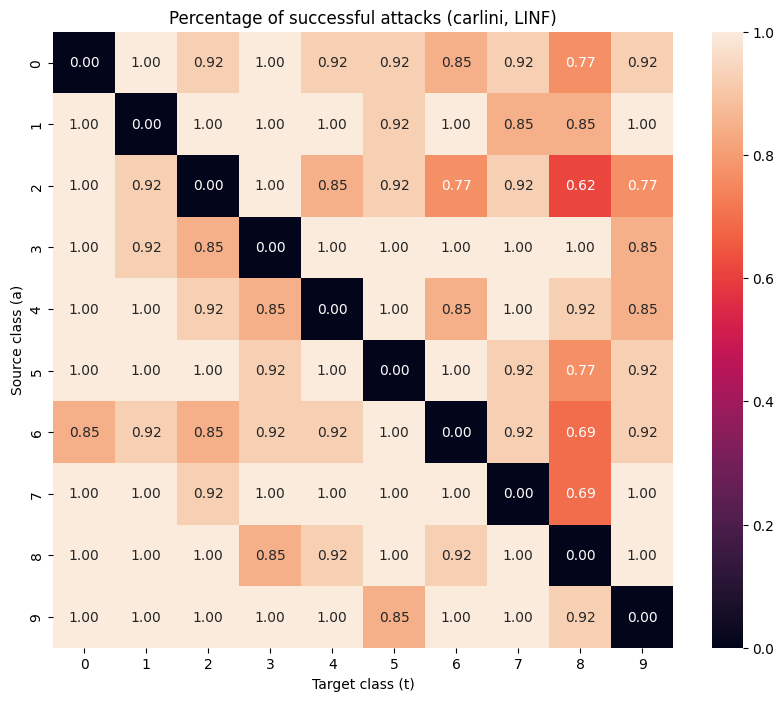

In [14]:
source_target_heatmap_success(formulation='carlini', norm='LINF')

### Number of iterations needed heatmaps

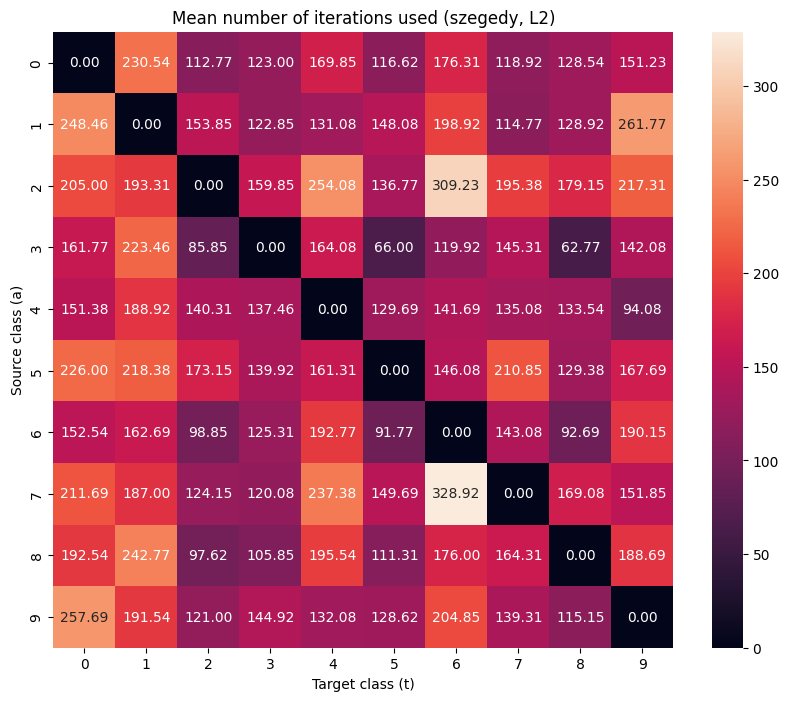

In [15]:
source_target_heatmap_nits()

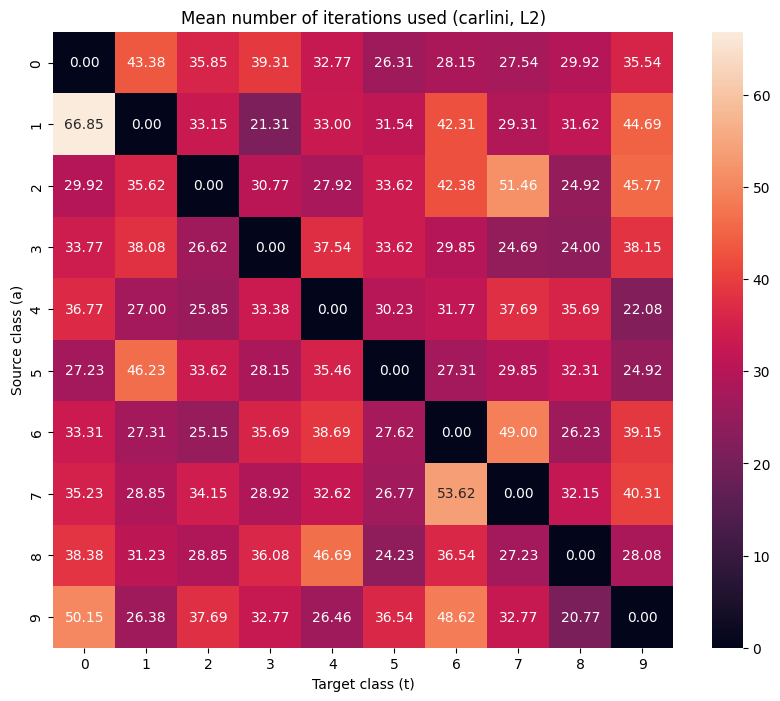

In [16]:
source_target_heatmap_nits(formulation='carlini')

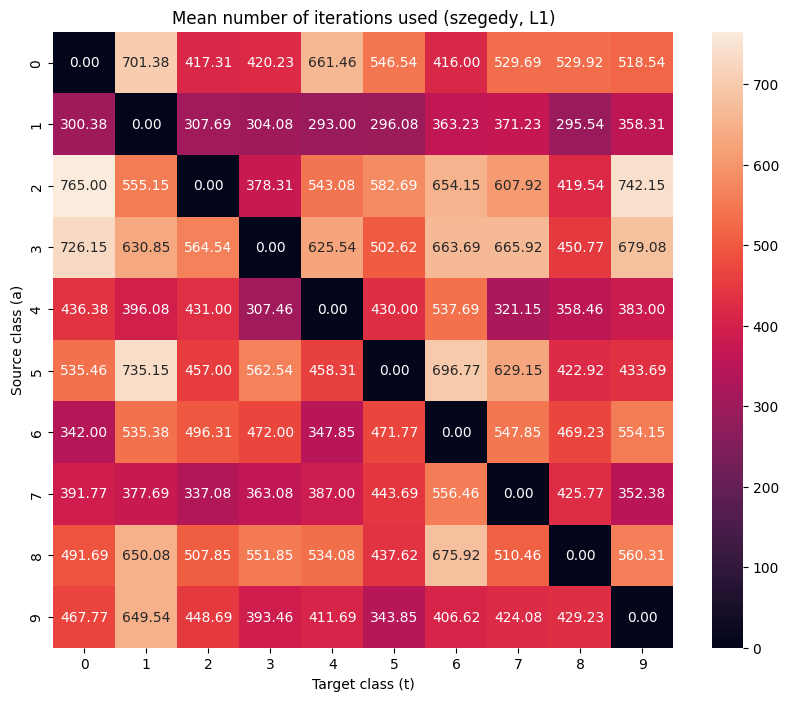

In [17]:
source_target_heatmap_nits(norm='L1')

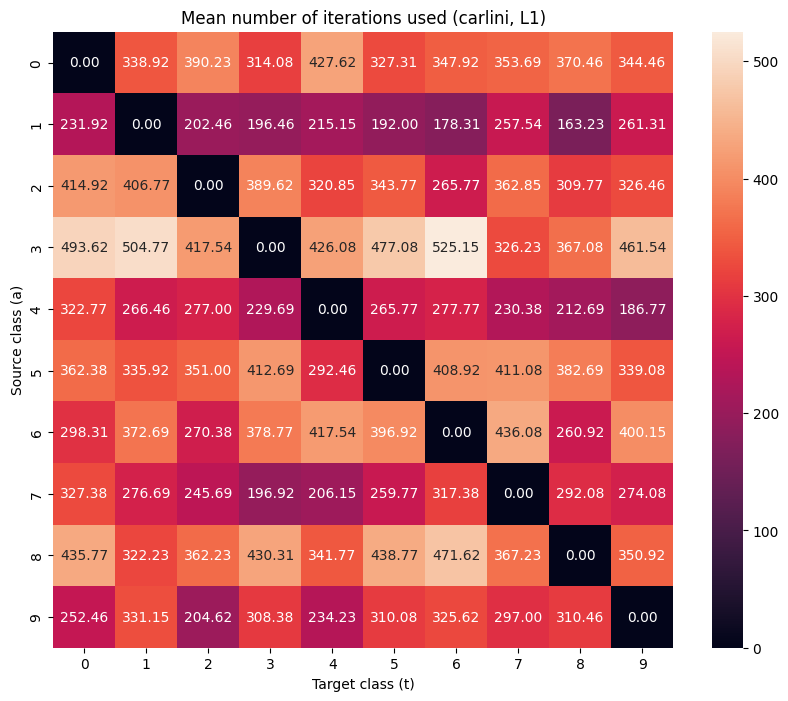

In [18]:
source_target_heatmap_nits(formulation='carlini', norm='L1')

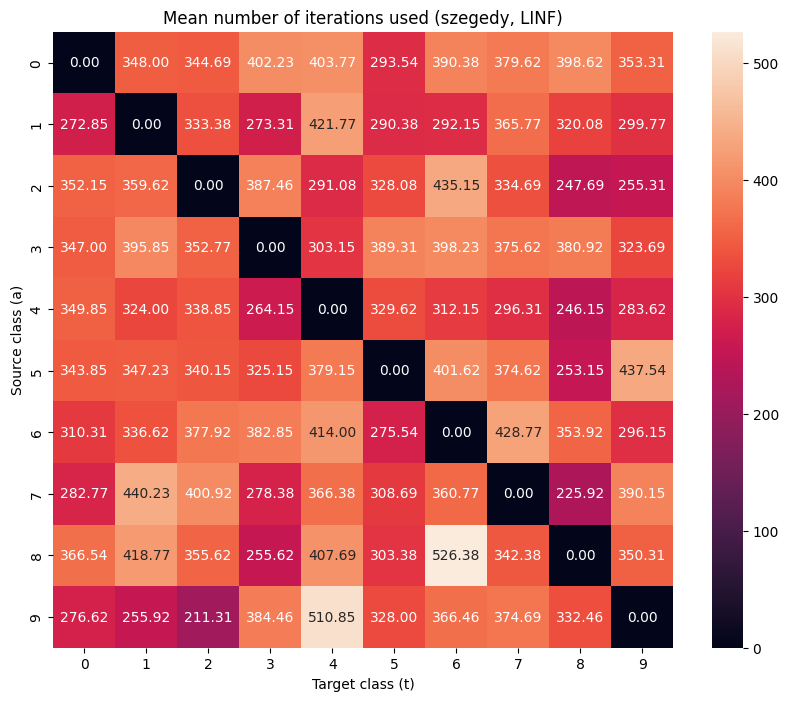

In [19]:
source_target_heatmap_nits(norm='LINF')

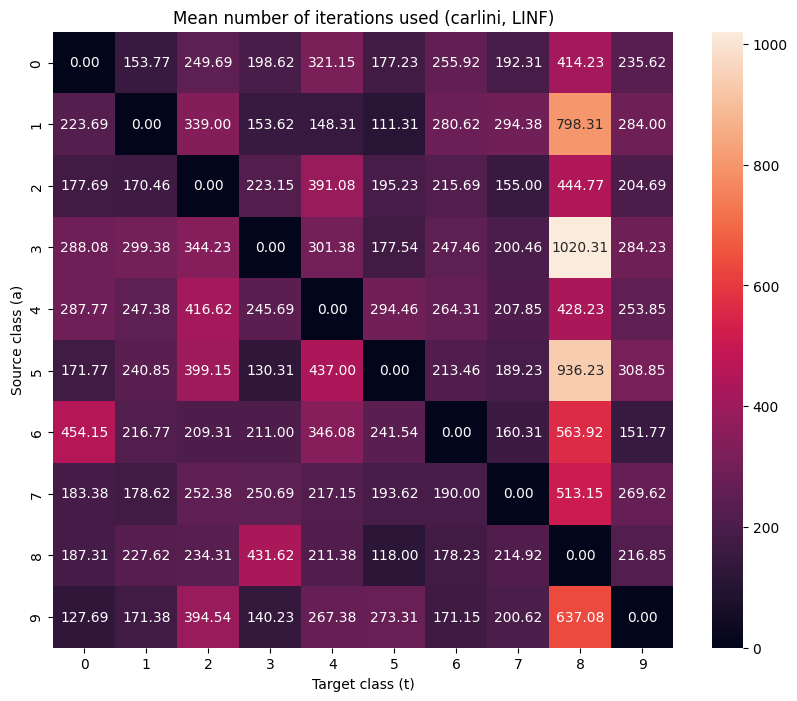

In [20]:
source_target_heatmap_nits(formulation='carlini', norm='LINF')

### Minimum distance heatmaps

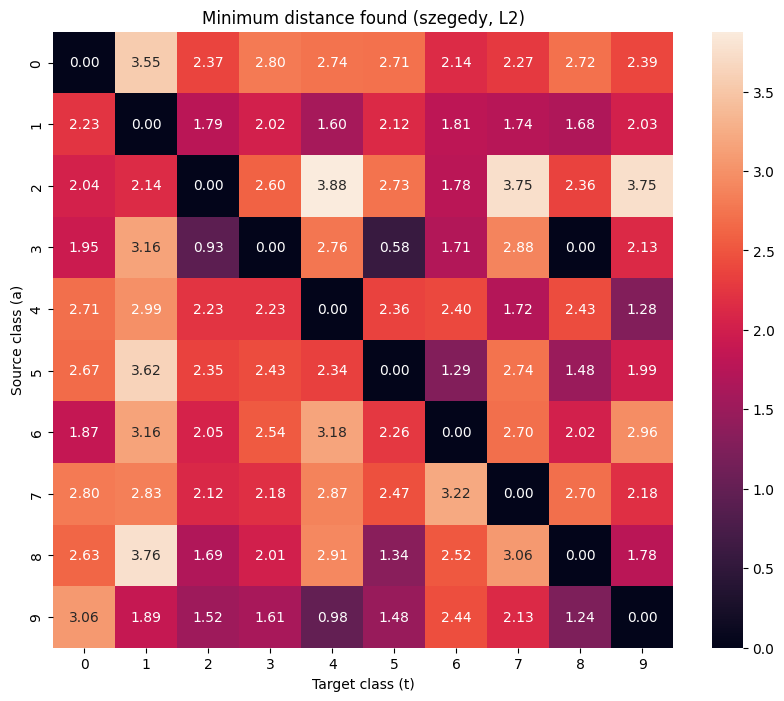

In [21]:
source_target_heatmap_min_dist()

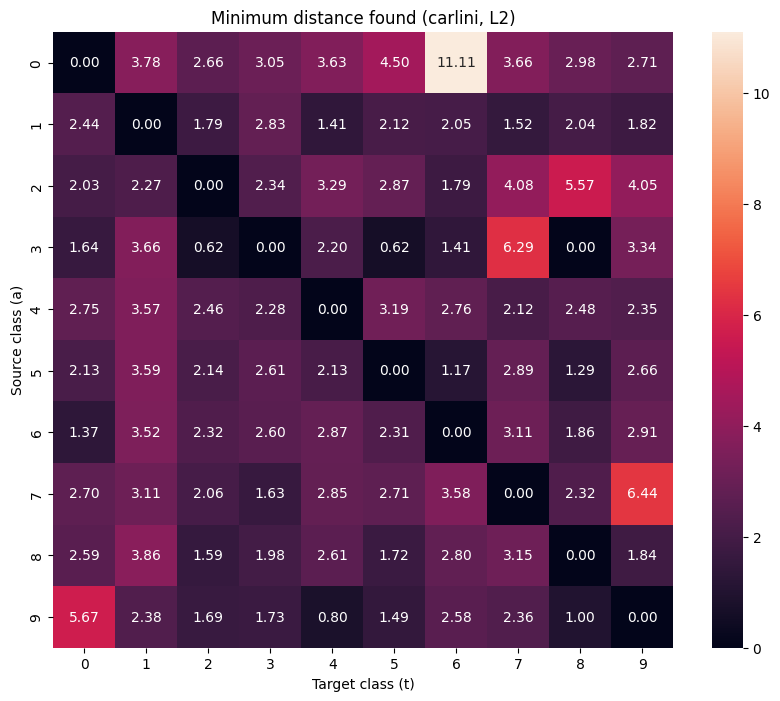

In [22]:
source_target_heatmap_min_dist(formulation='carlini')

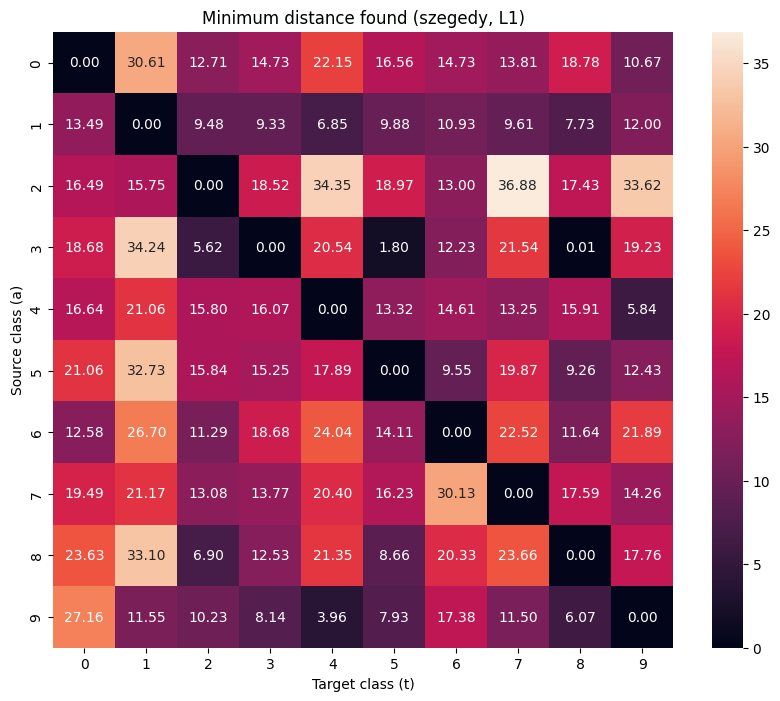

In [23]:
source_target_heatmap_min_dist(norm='L1')

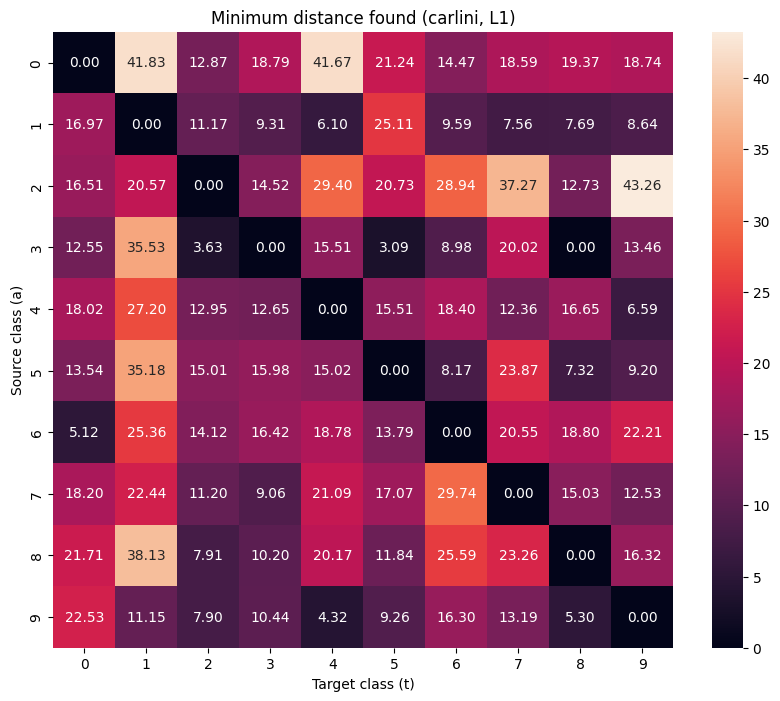

In [24]:
source_target_heatmap_min_dist(formulation='carlini', norm='L1')

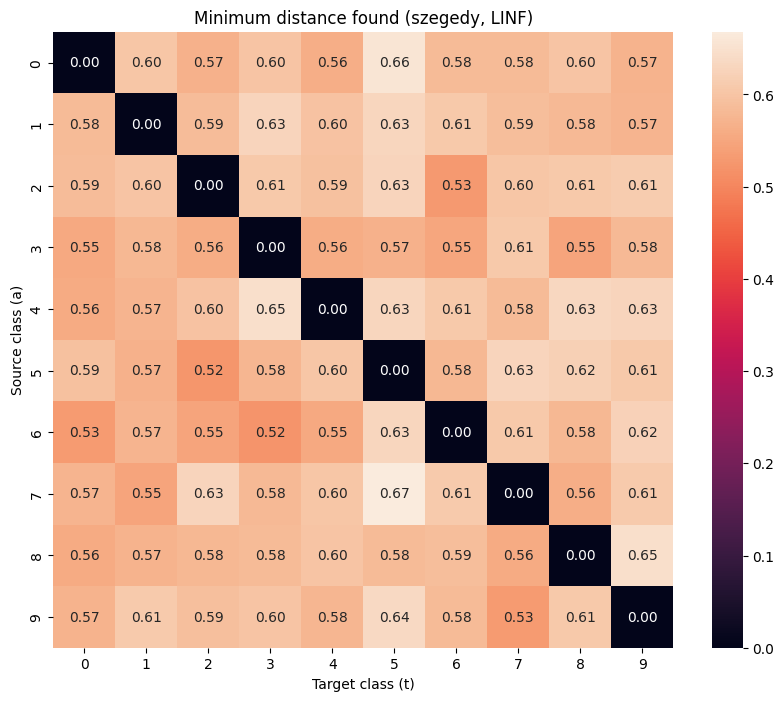

In [25]:
source_target_heatmap_min_dist(norm='LINF')

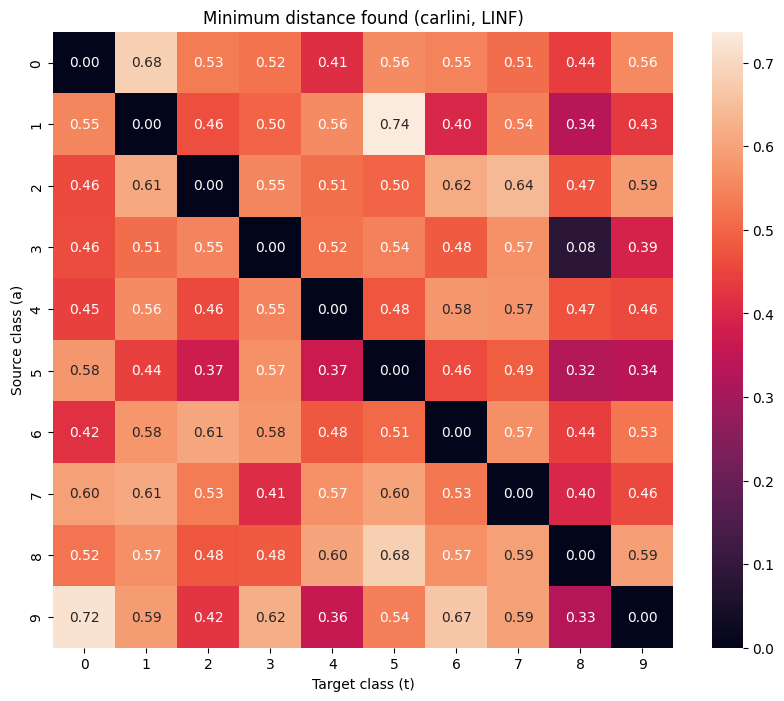

In [26]:
source_target_heatmap_min_dist(formulation='carlini', norm='LINF')

Step by step here so I don't forget what every thing does

In [27]:
filt_df = df[(df['formulation'] == 'szegedy') & (df['norm'] == 'L2')]

In [28]:
hm_succ = filt_df.groupby(['a','t'])['success'].mean().unstack(fill_value=0)
hm_succ

t,0,1,2,3,4,5,6,7,8,9
a,,,,,,,,,,
0,0.000000,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385
1,0.615385,0.000000,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385
2,0.615385,0.538462,0.000000,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385
3,0.615385,0.615385,0.615385,0.000000,0.615385,0.538462,0.615385,0.615385,1.000000,0.615385
4,0.615385,0.615385,0.692308,0.692308,0.000000,0.692308,0.615385,0.692308,0.615385,0.615385
5,0.615385,0.615385,0.615385,0.615385,0.615385,0.000000,0.615385,0.615385,0.615385,0.615385
6,0.615385,0.615385,0.692308,0.692308,0.615385,0.615385,0.000000,0.692308,0.615385,0.615385
7,0.615385,0.615385,0.615385,0.615385,0.692308,0.692308,0.692308,0.000000,0.615385,0.615385
8,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.615385,0.000000,0.615385


In [29]:
hm_nits = filt_df.groupby(['a','t'])['nits'].mean().unstack()
hm_nits

t,0,1,2,3,4,5,6,7,8,9
a,,,,,,,,,,
0,NaN,230.538462,112.769231,123.000000,169.846154,116.615385,176.307692,118.923077,128.538462,151.230769
1,248.461538,NaN,153.846154,122.846154,131.076923,148.076923,198.923077,114.769231,128.923077,261.769231
2,205.000000,193.307692,NaN,159.846154,254.076923,136.769231,309.230769,195.384615,179.153846,217.307692
3,161.769231,223.461538,85.846154,NaN,164.076923,66.000000,119.923077,145.307692,62.769231,142.076923
4,151.384615,188.923077,140.307692,137.461538,NaN,129.692308,141.692308,135.076923,133.538462,94.076923
5,226.000000,218.384615,173.153846,139.923077,161.307692,NaN,146.076923,210.846154,129.384615,167.692308
6,152.538462,162.692308,98.846154,125.307692,192.769231,91.769231,NaN,143.076923,92.692308,190.153846
7,211.692308,187.000000,124.153846,120.076923,237.384615,149.692308,328.923077,NaN,169.076923,151.846154
8,192.538462,242.769231,97.615385,105.846154,195.538462,111.307692,176.000000,164.307692,NaN,188.692308


## $c$ vs distance

### L2 norm

In [30]:
filt_df = df[(df['formulation'] == 'szegedy') & (df['norm'] == 'L2')]
filt_df

,a,t,c,formulation,norm,attacker_name,success,distance,nits,log2_c
26,4,9,0.015625,szegedy,L2,SciPyAttack,True,2.067629e+00,92,-6.0
27,4,9,0.031250,szegedy,L2,SciPyAttack,True,1.958410e+00,91,-5.0
28,4,9,0.062500,szegedy,L2,SciPyAttack,True,1.798259e+00,107,-4.0
29,4,9,0.125000,szegedy,L2,SciPyAttack,True,1.751175e+00,100,-3.0
30,4,9,0.250000,szegedy,L2,SciPyAttack,True,1.674095e+00,107,-2.0
...,...,...,...,...,...,...,...,...,...,...
1308,9,8,4.000000,szegedy,L2,SciPyAttack,False,9.103662e-01,160,2.0
1309,9,8,8.000000,szegedy,L2,SciPyAttack,False,5.351837e-07,44,3.0
1310,9,8,16.000000,szegedy,L2,SciPyAttack,False,3.399215e-07,34,4.0
1311,9,8,32.000000,szegedy,L2,SciPyAttack,False,1.444088e-07,41,5.0


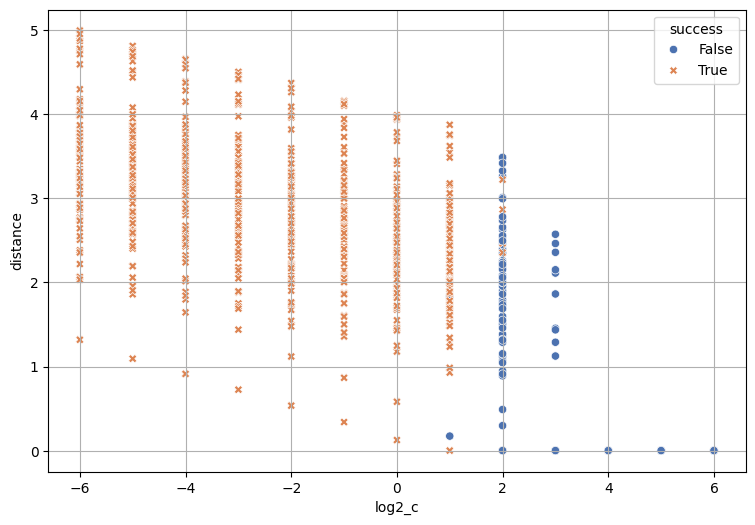

In [31]:
plt.figure(figsize=FIGSIZE)
sns.scatterplot(data=filt_df, x='log2_c', y='distance', hue='success', style='success', palette='deep')
plt.grid(True)
plt.show()

Looks like there's a trend. Let's see first the mean distance for each c, without caring if the attack was successful or not

In [32]:
grouped = filt_df.groupby(['log2_c'], as_index=False)['distance'].mean()
grouped

,log2_c,distance
0,-6.0,3.459641e+00
1,-5.0,3.294743e+00
2,-4.0,3.134444e+00
3,-3.0,2.978029e+00
4,-2.0,2.826857e+00
5,-1.0,2.674513e+00
6,0.0,2.497614e+00
7,1.0,2.315879e+00
8,2.0,1.979265e+00
9,3.0,2.092296e-01


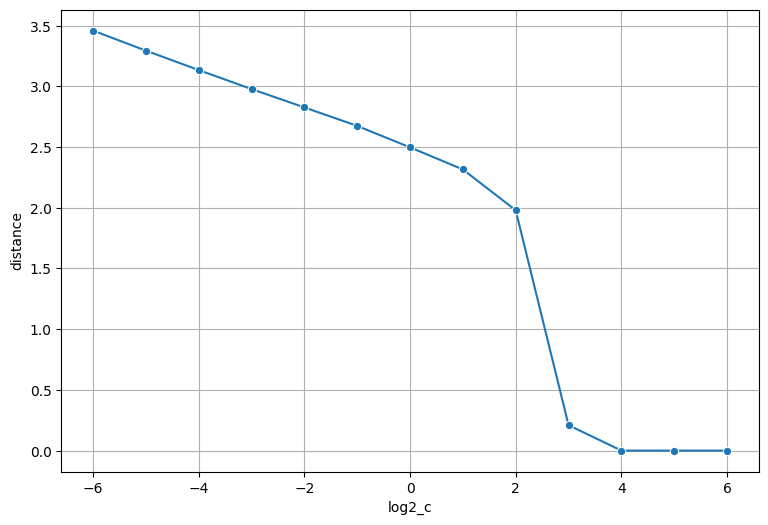

In [33]:
plt.figure(figsize=FIGSIZE)
sns.lineplot(data=grouped, x='log2_c', y='distance', marker='o')
plt.grid(True)
plt.show()

Now for Carlini's formulation

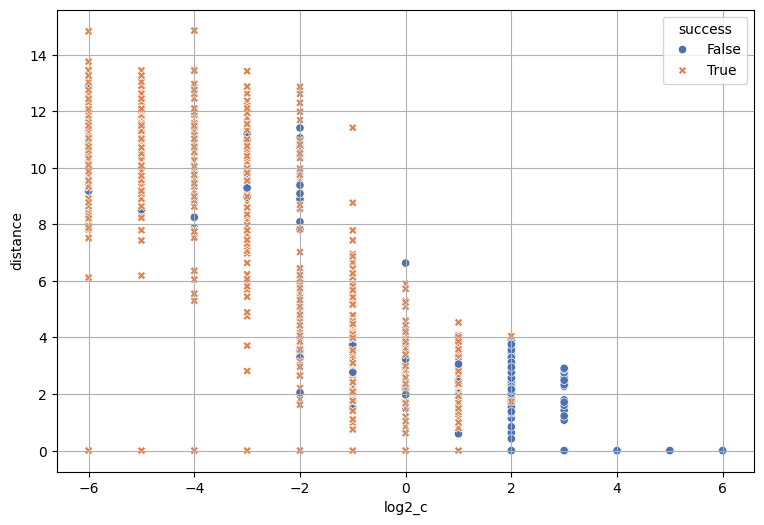

In [34]:
filt_df_carlini = df[(df['formulation'] == 'carlini') & (df['norm'] == 'L2')]
plt.figure(figsize=FIGSIZE)
sns.scatterplot(data=filt_df_carlini, x='log2_c', y='distance', hue='success', style='success', palette='deep')
plt.grid(True)
plt.show()

Now let's see how it looks for successful vs. non-successful attacks

In [35]:
grouped = filt_df.groupby(['log2_c', 'success'], as_index=False)['distance'].mean()
grouped

,log2_c,success,distance
0,-6.0,True,3.459641e+00
1,-5.0,True,3.294743e+00
2,-4.0,True,3.134444e+00
3,-3.0,True,2.978029e+00
4,-2.0,True,2.826857e+00
5,-1.0,True,2.674513e+00
6,0.0,True,2.497614e+00
7,1.0,False,1.003951e+00
8,1.0,True,2.345695e+00
9,2.0,False,1.946065e+00


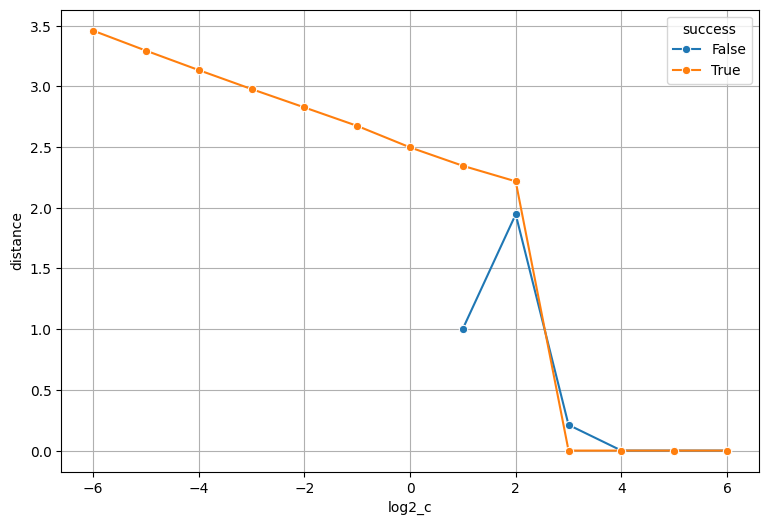

In [36]:
plt.figure(figsize=FIGSIZE)
sns.lineplot(data=grouped, x='log2_c', y='distance', hue='success', marker='o')
plt.grid(True)
plt.show()

Seems like larger $c$ imply shorter distnce, but less successful attacks

In [37]:
def c_vs_distance_plot(formulation='szegedy', norm='L2'):
    filt_df = df[(df['formulation'] == formulation) & (df['norm'] == norm)]

    dist_grouped = filt_df.groupby(['log2_c'], as_index=False)['distance'].mean()
    sucs_grouped = filt_df.groupby(['log2_c'], as_index=False)['success'].mean()

    # Create figure and axis
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot mean distance on primary y-axis
    sns.lineplot(data=dist_grouped, x='log2_c', y='distance', marker='o', ax=ax1, label='Mean distance', color='tab:blue', legend=False)
    ax1.set_xlabel('c value (log_2 scale)')
    ax1.set_ylabel('Mean distance', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create secondary y-axis
    ax2 = ax1.twinx()
    sns.lineplot(data=sucs_grouped, x='log2_c', y='success', marker='s', ax=ax2, label='Success rate', color='tab:orange', legend=False)
    ax2.set_ylabel('Success rate', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    plt.title(f'Mean Distance and Success Rate vs c ({formulation}, {norm})')
    ax1.grid(True)

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

    plt.tight_layout()
    plt.show()

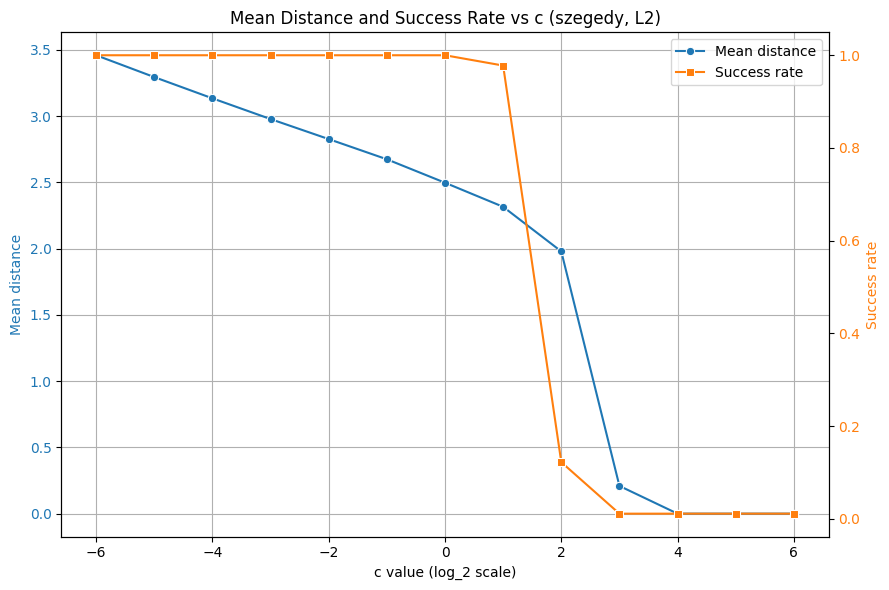

In [38]:
c_vs_distance_plot()

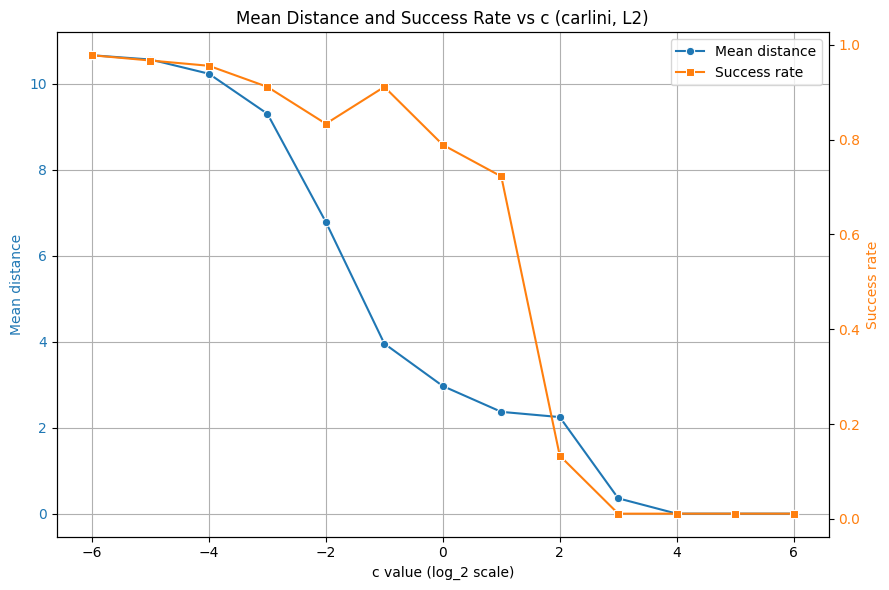

In [39]:
c_vs_distance_plot(formulation='carlini')

### $L_{\infty}$ norm

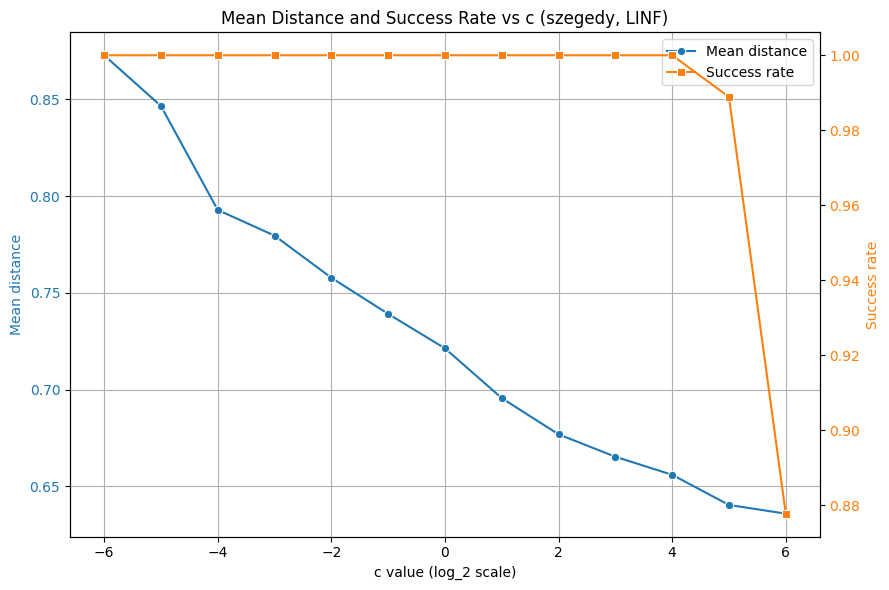

In [40]:
c_vs_distance_plot(norm='LINF')

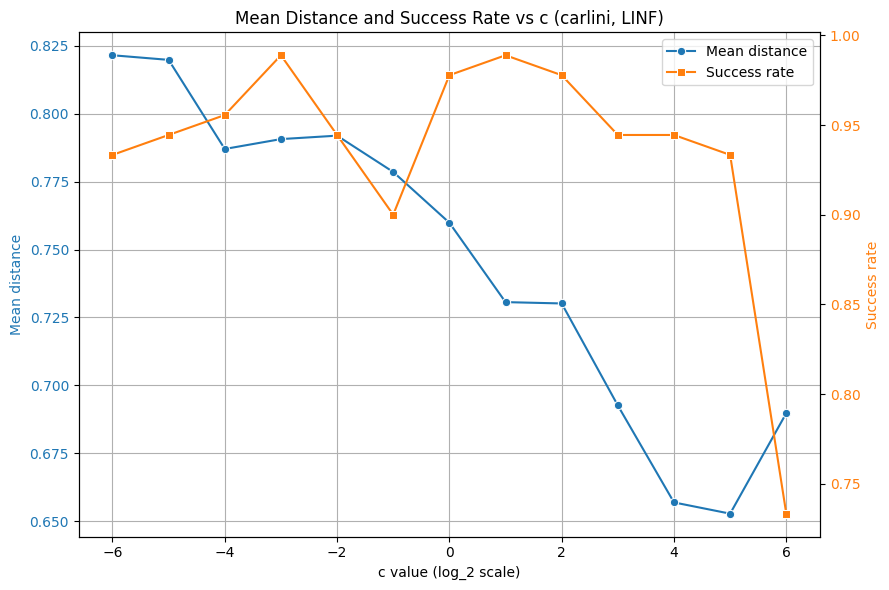

In [41]:
c_vs_distance_plot(formulation='carlini', norm='LINF')

### $L_1$ norm

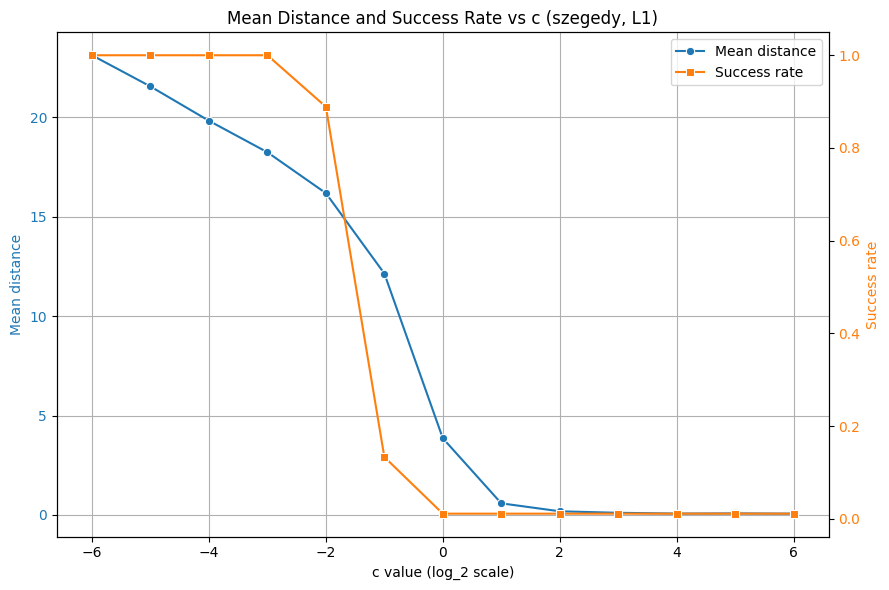

In [42]:
c_vs_distance_plot(norm='L1')

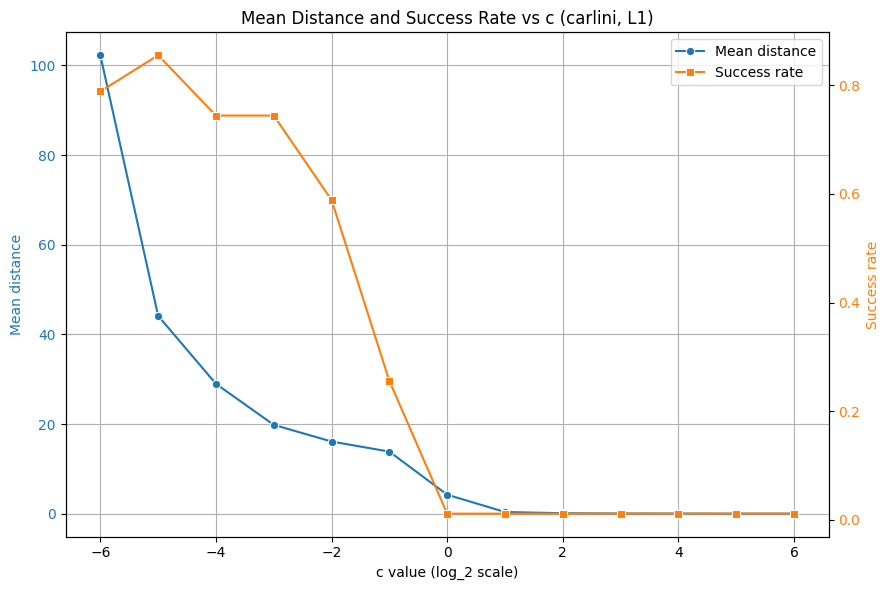

In [43]:
c_vs_distance_plot(formulation='carlini', norm='L1')